---

<!-- <a href="https://github.com/rraadd88/roux/blob/master/examples/roux_viz_sets.ipynb"><img align="right" style="float:right;" src="https://img.shields.io/badge/-source-cccccc?style=flat-square"></a>
 -->
 
# 📈⬤⬤ Plots of sets.

In [1]:
# installing the required roux subpackage
# !pip install roux[viz]
# loading requirements
import pandas as pd
import matplotlib.pyplot as plt

## Crosstab
**Demo data**

In [2]:
## for linear dfs
def get_demo_data(
    n=100,
    ) -> pd.DataFrame:
    """Demo data to test the differences."""
    import numpy as np
    d={}
    for i in [1,2]:
        np.random.seed(i)
        d[f'c{i}']=np.random.choice(a=[False, True], size=n,p=[0.5,0.5])
    return pd.DataFrame(d)
data=get_demo_data(n=100)
data.head(1)

,c1,c2
0,False,False


### As a table

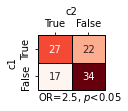

In [3]:
from roux.viz.sets import plot_intersection_counts
ax=plot_intersection_counts(data,['c1','c2'])

### As a bar plot

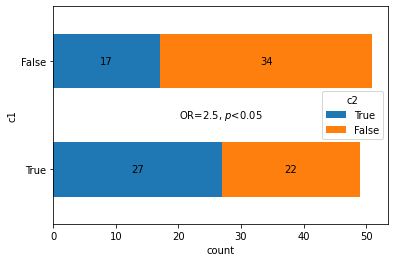

In [4]:
from roux.viz.sets import plot_intersection_counts
ax=plot_intersection_counts(data,['c1','c2'],kind='bar')

## Subsets
**Demo data**

In [5]:
import numpy as np
data=pd.DataFrame({
    'id': range(100),
    'subset':np.random.choice( list(range(20)) , size = 100, replace = True, p = None),
    })
# print(f"counts: {data.groupby('subset')['id'].nunique()}")
data.head(1)

,id,subset
0,0,10


### Pies

In [6]:
from roux.viz.sets import _to_data_plot_pie
## prepare the input for the pie chart
data_=_to_data_plot_pie(
    data.groupby('subset')['id'].nunique(),
    show_n=True,
    rename={i:f'p{i}' for i in data['subset'].unique()},
    explode='first',
    )
data_.head(1)

,labels,counts,explode
10,p10\n3% (3),3,0.1


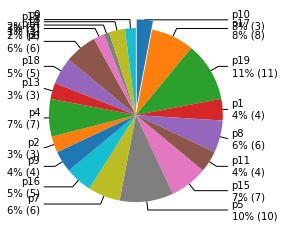

In [7]:
from roux.viz.sets import plot_pie
## pie chart
_=plot_pie(
    **data_.to_dict('list'),
    )

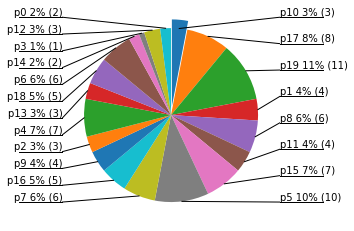

In [8]:
# arrange annotations on the left using `roux.viz.annot`'s `annot_side` function
from roux.viz.sets import plot_pie
## pie chart
_=plot_pie(
    **data_.to_dict('list'),
    annot_side=True,
    kws_annot_side=dict(offx3=0,length_axhline=1.2), # keyword parameters provided to `annot_side` function
    )

### Documentation
[`roux.viz.sets`](https://github.com/rraadd88/roux#module-rouxvizsets)